This is where we can use functions writen in other files so that we don't have to alter other files whenever we want to use a function (for example, changing the value of "path" in a file every time we change folders)

In [ ]:
# like this
from VoltagevsAmplitude import saveACvoltages
path = r"/data/20170511/bead2_15um_QWP/new_sensor_feedback/charge7_piezo_56.9_74.9_75.4"
saveACvoltages(path)

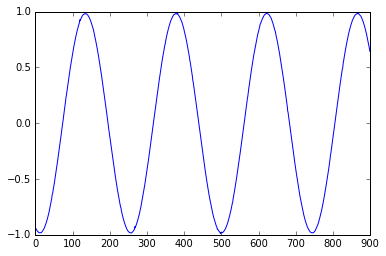

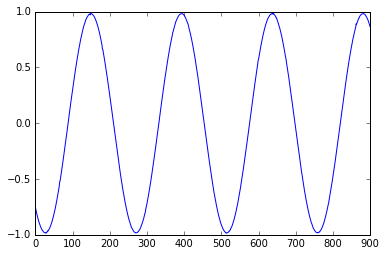

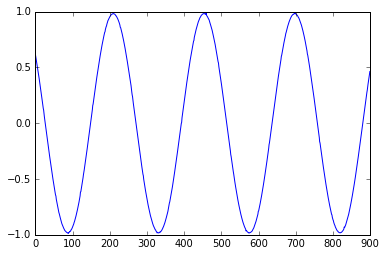

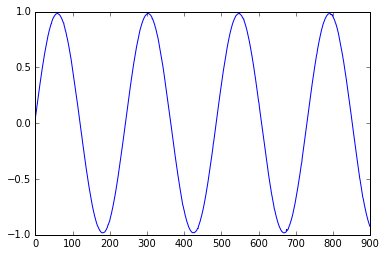

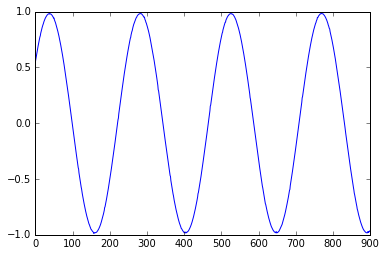

In [3]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
from matplotlib import mlab
import h5py
import os
import bead_util as bu

fs = 10000
noisepath = "/data/20170622/bead4_15um_QWP/reality_noise_test/"
path = "/data/20170622/bead4_15um_QWP/reality_test2/"

def getdata(fname):
    _, fext = os.path.splitext(fname)
    if(fext == ".h5"):
        f = h5py.File(fname, "r")
        dset = f["beads/data/pos_data"]
        dat = np.transpose(dset)
        Fs = dset.attrs["Fsamp"]
        dat = dat * 10./(2**15 - 1)
        
    else:
        dat = np.loadtxt(fname)
        
    x = dat[:, bu.xi] - np.mean(dat[:, bu.xi])
    drive = dat[:, 7]- np.mean(dat[:, 7])
    return x, drive

for file in os.listdir(path)[0:5]:
    _, fext = os.path.splitext(file)
    if fext == ".h5":
        x, drive = getdata(os.path.join(path, file))
        drive = drive/np.amax(np.abs(drive))
        plt.plot(drive[100:1000])
        plt.show()